<a href="https://colab.research.google.com/github/Null2648/google-colab/blob/main/09_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95(Gradient_Descent).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 경사하강법이란?

 - 손실을 줄이는 알고리즘
 - 기울기가 최소가 되는 점을 찾아서 알맞은 가중치를 찾아내는 것
 - 손실함수를 최적화하는 방법중 하나다

In [31]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
cd /content/drive/MyDrive/Colab Notebooks/google-colab

/content/drive/MyDrive/Colab Notebooks/google-colab


In [33]:
!git config --global user.email '(jhkim208@naver.com)'
!git config --global user.name '(Aa)'

In [34]:
!git add 09. 경사하강법(Gradient Descent).ipynb

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `git add 09. 경사하강법(Gradient Descent).ipynb'


In [35]:
!git commit -m '원하는 아무 메시지'
!git push

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date


## 점진적인 학습 또는 온라인 학습

In [15]:
# 경사하강법을 꼭 쓰는 애들이 있고 그것중 하나가 신경망 알고리즘이다
## 신경망 알고리즘은 딥러닝이다
# 손실함수?
# 여러개씩 내려오는게 미니 배치 경사하강법이고
## 미니 배치 경사하강법이 실전에서 많이쓰인다고한다

#  확률적 경사 하강법(SGD)

In [16]:
# 확률적 경사하강법은 하나씩 내려온다고 한다
# 손실함수 비용함수는 엄밀이 말하면 차이가 있다.
## 로지스틱 손실 함수
# 일반적인 분류일땐 크로스 엔트로피??
# https://hipster4020.tistory.com/146

# 확률적 경사 하강법을 활용한 분류 모델

## 필수 라이브러리 로딩

In [17]:
import numpy as np
import io
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 한글 폰트 설정
mpl.rc('font', family = 'malgun gothic')
# 유니코드에서 음수 부호 설정
mpl.rc('axes', unicode_minus = False)

warnings.filterwarnings('ignore')

## 훈련데이터 로딩

In [19]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [20]:
# target 고유값 추출
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [21]:
# Species를 제외한 나머지 특성을 입력 데이터
# Species는 타깃 데이터

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

## 특성 전처리와 훈련세트, 테스트세트로 분리

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    fish_input, fish_target, random_state = 42)

# 표준화
ss = StandardScaler()
ss.fit(X_train)

train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)


## 확률적 경사 하강법으로 모델 훈련

In [23]:
# SGDClassifier 클래스: 확률적 경사 하강법을 제공하는 분류용 클래스
from sklearn.linear_model import SGDClassifier

# loss function(손실함수), 손실 함수의 종류를 지칭하는 매개변수(loss)
## 이진분류회귀: 이진크로스엔트로피
## 다중분류회귀: 크로스엔트로피, 소프트맥스
# max_iter: 수행할 에포크 횟수
sc = SGDClassifier(loss='log', max_iter= 10, random_state =42)
sc.fit(train_scaled, y_train)

# 평가
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))


0.773109243697479
0.775


In [24]:
# 모델을 이어서 훈련할 때 partial_fit()
sc.partial_fit(train_scaled, y_train)
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.8151260504201681
0.85


## 가장 적절한 에포크 횟수 찾기
 - 에포크 횟수가 적어 모델이 훈련세트를 덜 학습하면 과소적합이 발생한다.
 - 너무 많은 에포크 횟수는 과대적합된 모델일 가능성이 높다. 

In [25]:
#sc.partial_fit()를 이용해서 적절한 에포크 값 찾기

sc = SGDClassifier(loss='log', random_state=42) #여기서 에포크 값은 주지 않음

train_score = []
test_score = []

#parial_fit()만 사용하려면 훈론세트의 전체 클래스의 레이블을 전달해줘야 한다.
classes = np.unique(y_train)

#300번의 에포크 동안 훈련을 반복하여 진행
for _ in range(0, 300):
    sc.partial_fit(train_scaled, y_train, classes = classes)
    train_score.append(sc.score(train_scaled, y_train))
    test_score.append(sc.score(test_scaled, y_test))
    

## 에포크 횟수에 따른 점수 시각화 작업

In [26]:
#차트 스타일 지정
sns.set(font='malgun gothic', rc={'axes.unicode_minus':False}, style = 'darkgrid')
plt.rc('figure', figsize=(10, 8))

<function matplotlib.pyplot.show(*args, **kw)>

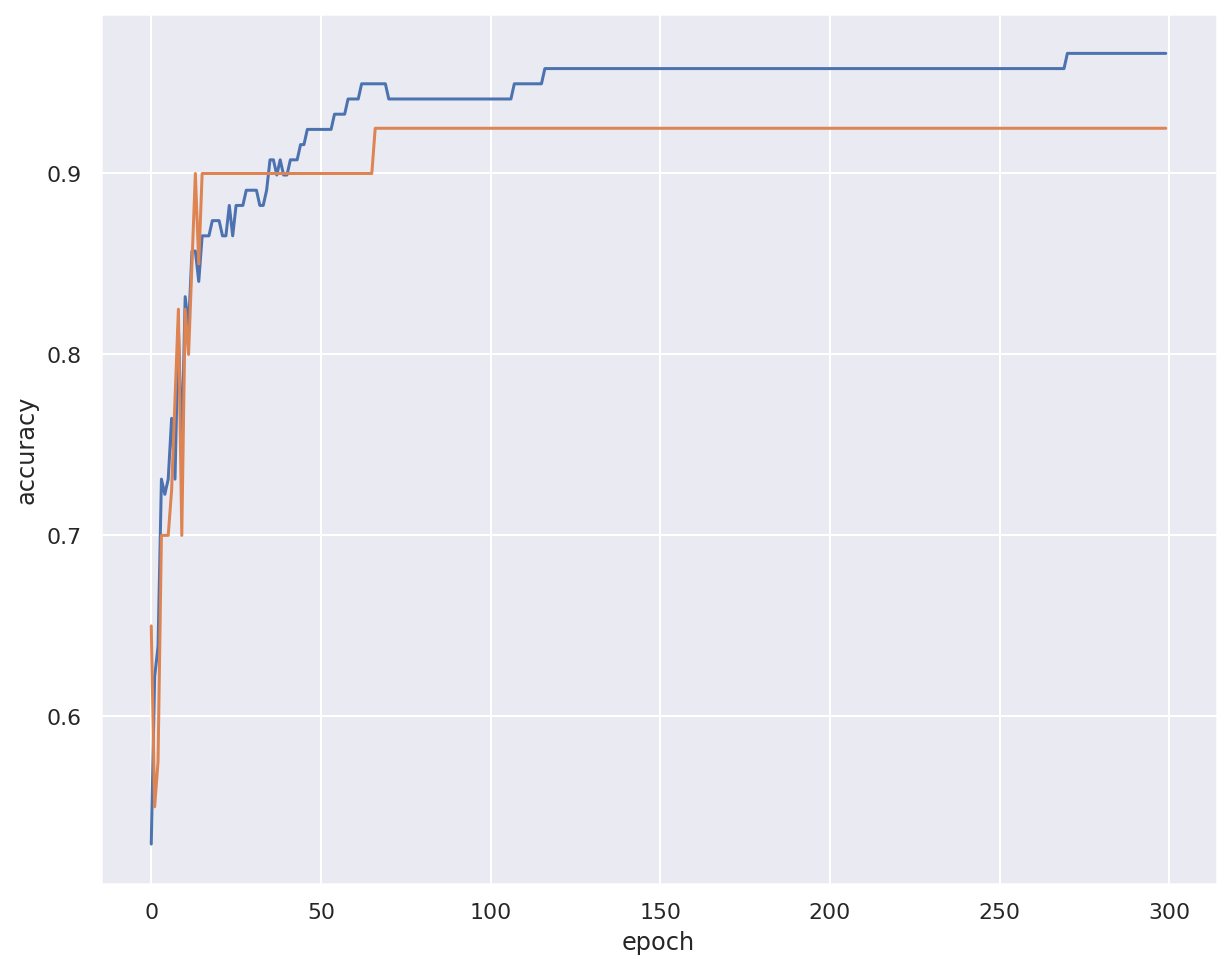

In [27]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')                                        
plt.ylabel('accuracy')
plt.show

In [28]:
# 조기종료 가능 : 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 훈련을 멈추는 기능
# tol : 최소값을 지정하는 것 / 향상된 최소값을 지정하는 매개변수로 해당 최소값이 되면 조기종료하는 것
# tol = None 자동으로 멈추지 않고, 우리가 지정한 에포크 횟수(max_iter)만큼 반복된다.
# SVM에서 손실함수의 defualt 값 hinge
sc = SGDClassifier(loss='log', max_iter=100, tol = None, random_state=42)
# 서포트 벡터 머신(SVM) 알고리즘에서 사용되느 손실함수의 기본값은 hinge
sc.fit(train_scaled, y_train)

#평가
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.957983193277311
0.925
